# Иерархическая кластеризация

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
# импортируем набор данных
df = pd.read_csv(r'C:\Users\asham\data\wine-clustering.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
class1=df.columns

In [4]:
class1

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [8]:
cluster_num=3
K_means = KMeans(n_clusters = 3,
                 max_iter = 300,
                random_state = 1)
y_kmeans = K_means.fit_predict(df)

In [9]:
y_kmeans

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1])

In [10]:
df["clus_km"]=y_kmeans
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,clus_km
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


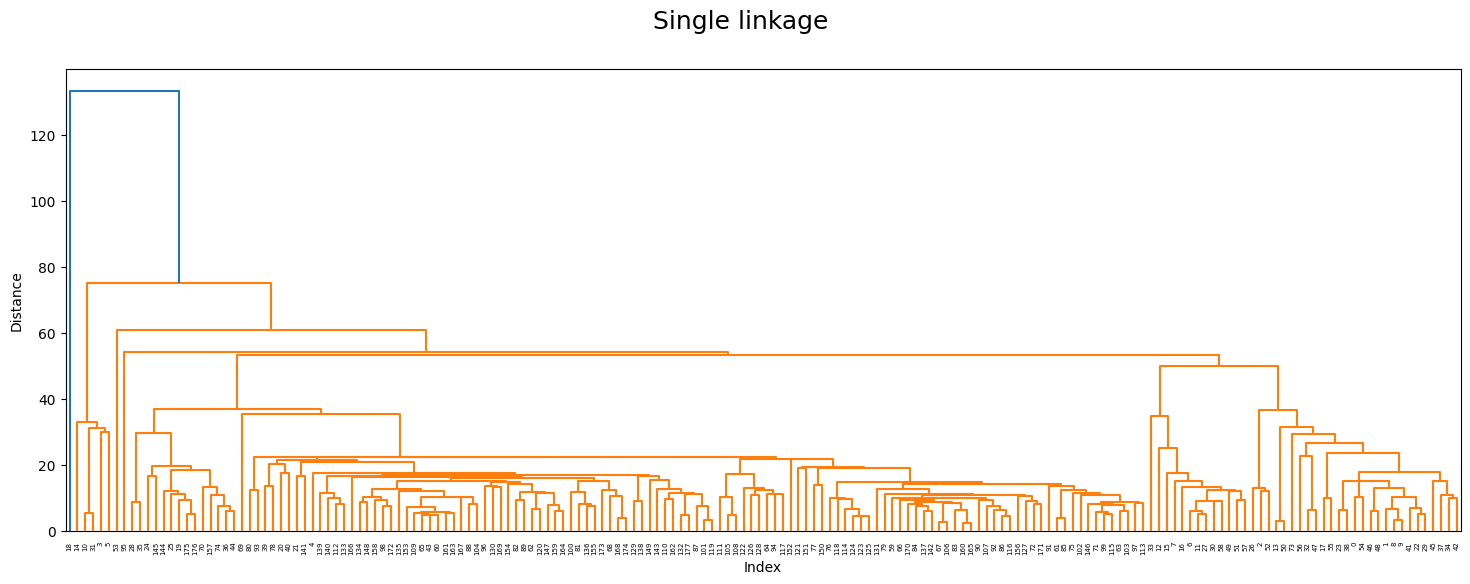

In [11]:
dist_single = linkage(df.loc[:, ["Alcohol",
                                 "Malic_Acid",
                                 "Ash",
                                 "Ash_Alcanity",
                                "Magnesium",
                                "Total_Phenols",
                                "Flavanoids",
                                "Nonflavanoid_Phenols",
                                "Proanthocyanins",
                                "Color_Intensity",
                                "Hue",
                                "OD280",
                                "Proline"
                                ]], method="single")
plt.figure(figsize=(18, 6))
dendrogram(dist_single)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Single linkage", fontsize=18)
plt.show()

In [12]:
from scipy.cluster.hierarchy import fcluster
df_SM=df.copy()

df_SM['2_clust']=fcluster(dist_single, 2, criterion='maxclust')
df_SM['3_clust']=fcluster(dist_single, 3, criterion='maxclust')
df_SM.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,clus_km,2_clust,3_clust
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,1,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,1,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,1,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,1,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,1,2


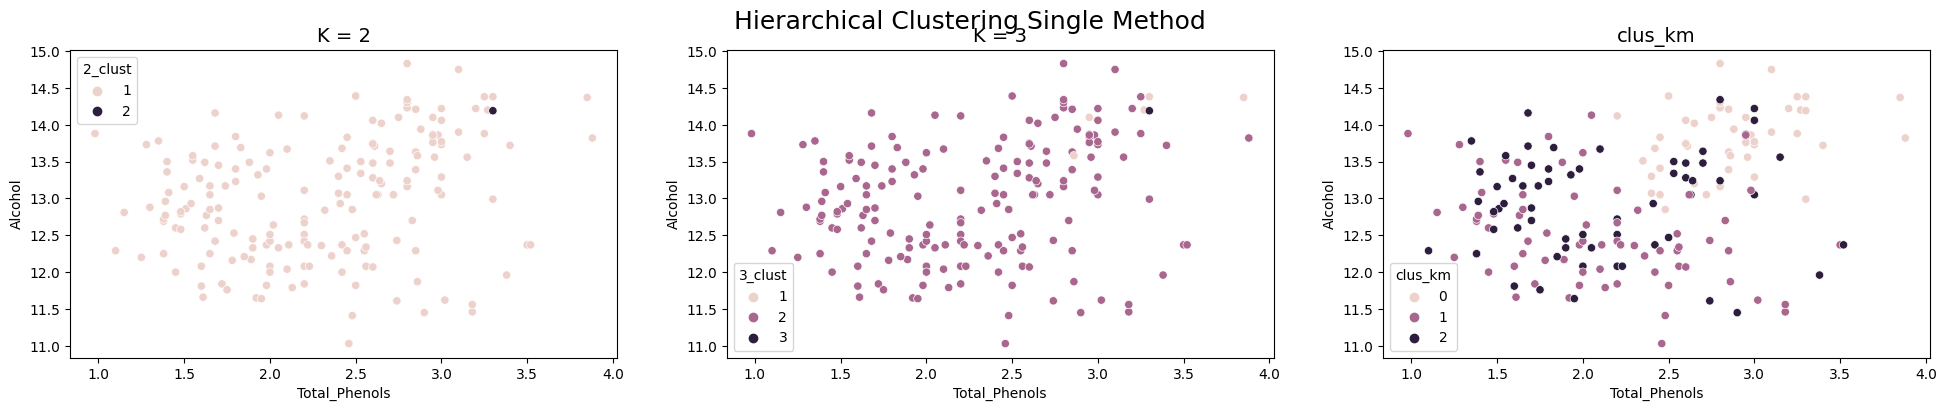

In [13]:
plt.figure(figsize=(24,4))

plt.suptitle("Hierarchical Clustering Single Method",fontsize=18)

plt.subplot(1,3,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="Total_Phenols",y="Alcohol", data=df_SM, hue="2_clust")

plt.subplot(1,3,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="Total_Phenols",y="Alcohol", data=df_SM, hue="3_clust")

plt.subplot(1,3,3)
plt.title("clus_km",fontsize=14)
sns.scatterplot(x="Total_Phenols",y="Alcohol", data=df_SM, hue="clus_km")
plt.show()

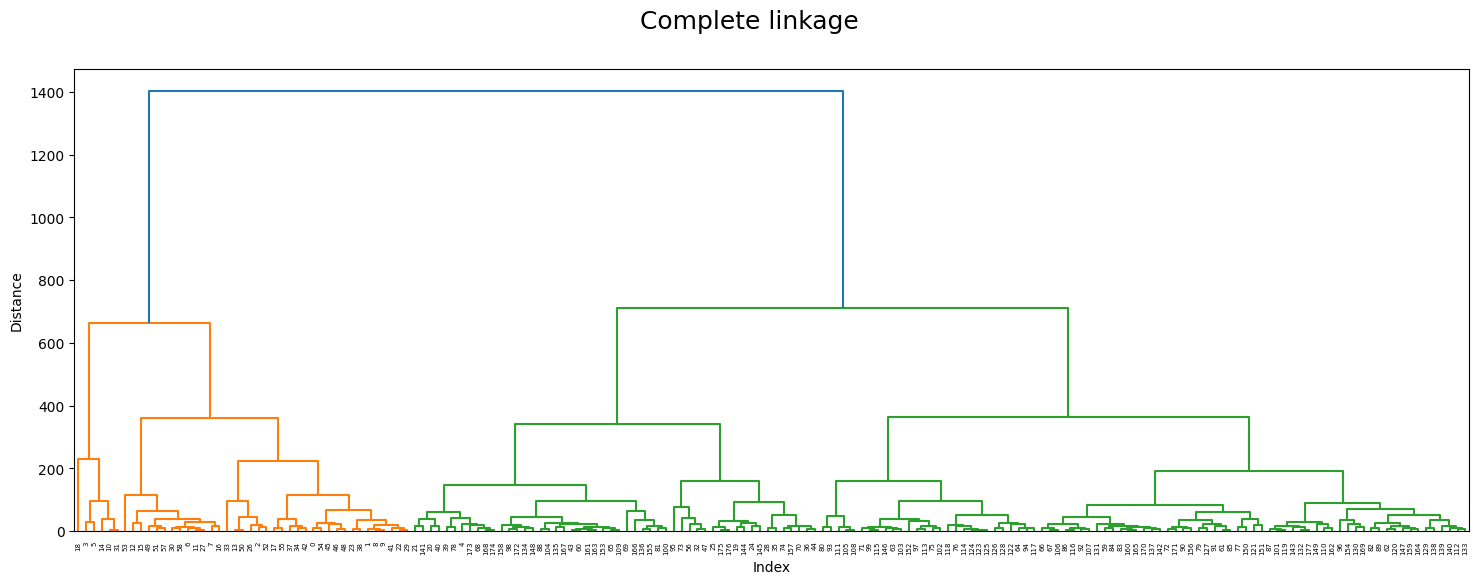

In [14]:
dist_comp = linkage(df.loc[:, ["Alcohol",
                                 "Malic_Acid",
                                 "Ash",
                                 "Ash_Alcanity",
                                "Magnesium",
                                "Total_Phenols",
                                "Flavanoids",
                                "Nonflavanoid_Phenols",
                                "Proanthocyanins",
                                "Color_Intensity",
                                "Hue",
                                "OD280",
                                "Proline"]], method="complete")
plt.figure(figsize=(18, 6))
dendrogram(dist_comp)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Complete linkage", fontsize=18)
plt.show()

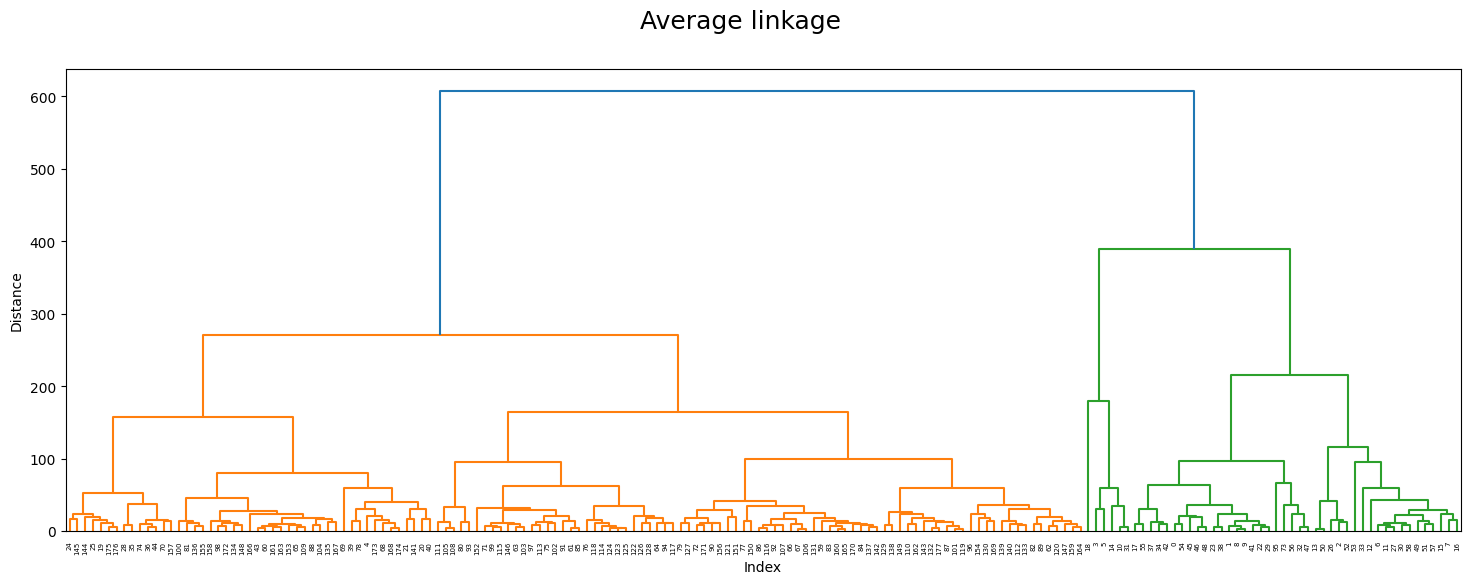

In [15]:
dist_av = linkage(df.loc[:, ["Alcohol",
                                 "Malic_Acid",
                                 "Ash",
                                 "Ash_Alcanity",
                                "Magnesium",
                                "Total_Phenols",
                                "Flavanoids",
                                "Nonflavanoid_Phenols",
                                "Proanthocyanins",
                                "Color_Intensity",
                                "Hue",
                                "OD280",
                                "Proline"]], method="average")
plt.figure(figsize=(18, 6))
dendrogram(dist_av)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Average linkage", fontsize=18)
plt.show()

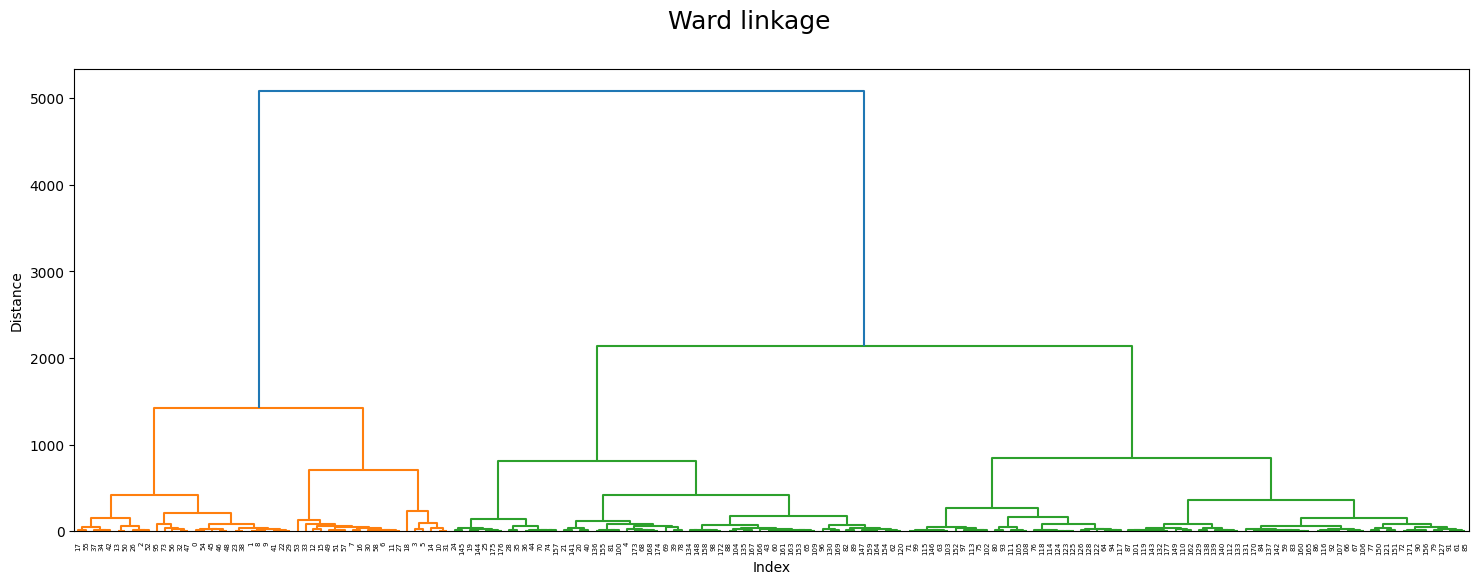

In [16]:
dist_w = linkage(df.loc[:, ["Alcohol",
                                 "Malic_Acid",
                                 "Ash",
                                 "Ash_Alcanity",
                                "Magnesium",
                                "Total_Phenols",
                                "Flavanoids",
                                "Nonflavanoid_Phenols",
                                "Proanthocyanins",
                                "Color_Intensity",
                                "Hue",
                                "OD280",
                                "Proline"]], method="ward")
plt.figure(figsize=(18, 6))
dendrogram(dist_w)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Ward linkage", fontsize=18)
plt.show()